In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

Contagem de saudáveis e doentes por sexo

In [5]:
sex_group = df.groupby('sex')['flag_doente'].agg([('Saudáveis', lambda x: (x==0).sum()), ('Doentes', lambda x: (x==1).sum())])
sex_group

,Saudáveis,Doentes
sex,,
0.0,72,25
1.0,92,114


In [7]:
import numpy as np

# Calculando as estatísticas necessárias
sex_group = df.groupby('sex')['flag_doente'].agg([('Saudáveis', lambda x: (x == 0).sum()), ('Doentes', lambda x: (x == 1).sum())])
sex_group['Total'] = sex_group['Saudáveis'] + sex_group['Doentes']
sex_group['Quantidade média de doentes'] = sex_group['Doentes'] / sex_group['Total']
sex_group['Odds'] = sex_group['Doentes'] / sex_group['Saudáveis']
sex_group['Odds ratio'] = sex_group['Odds'] / sex_group.loc[0.0, 'Odds']  # Usando o sexo feminino como referência
sex_group['Logito'] = np.log(sex_group['Odds'])
sex_group['WOE'] = np.log(sex_group['Odds ratio'])

print(sex_group)

     Saudáveis  Doentes  Total  ...  Odds ratio   Logito     WOE
sex                             ...                             
0.0         72       25     97  ...    1.000000 -1.05779  0.0000
1.0         92      114    206  ...    3.568696  0.21441  1.2722

[2 rows x 8 columns]


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [8]:
# Categorizar age em 5 grupos
df['age_group'] = pd.qcut(df['age'], 5, labels=False)

In [9]:
# Agregando os dados por grupo de idade
age_group_stats = df.groupby('age_group')['flag_doente'].agg([
    ('Saudáveis', lambda x: (x == 0).sum()),
    ('Doentes', lambda x: (x == 1).sum())
])
age_group_stats['Total'] = age_group_stats['Saudáveis'] + age_group_stats['Doentes']
age_group_stats['Quantidade média de doentes'] = age_group_stats['Doentes'] / age_group_stats['Total']
age_group_stats['Odds'] = age_group_stats['Doentes'] / age_group_stats['Saudáveis']
age_group_stats['Odds ratio'] = age_group_stats['Odds'] / age_group_stats.loc[age_group_stats.index[0], 'Odds']  # Referência do primeiro grupo
age_group_stats['Logito'] = np.log(age_group_stats['Odds'])
age_group_stats['WOE'] = np.log(age_group_stats['Odds ratio'])

# Calculando o valor médio da variável age para cada grupo
age_group_stats['Valor médio de age'] = df.groupby('age_group')['age'].mean()

age_group_stats

,Saudáveis,Doentes,Total,Quantidade média de doentes,Odds,Odds ratio,Logito,WOE,Valor médio de age
age_group,,,,,,,,,
0,47,16,63,0.253968,0.340426,1.000000,-1.077559,0.000000,41.222222
1,42,22,64,0.343750,0.523810,1.538690,-0.646627,0.430932,50.000000
2,32,39,71,0.549296,1.218750,3.580078,0.197826,1.275385,56.211268
3,13,32,45,0.711111,2.461538,7.230769,0.900787,1.978345,60.355556
4,30,30,60,0.500000,1.000000,2.937500,0.000000,1.077559,66.516667


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

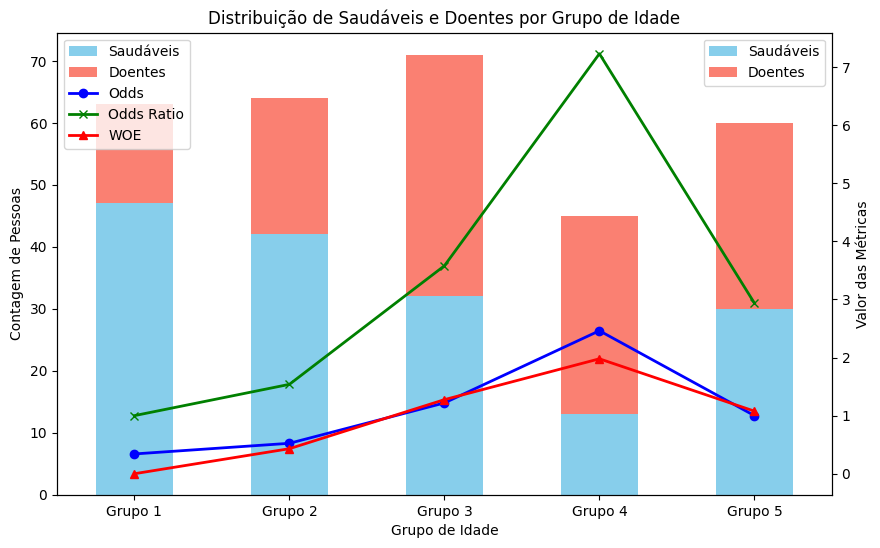

In [10]:
# Criando um gráfico de barras empilhadas e linhas para as métricas
fig, ax1 = plt.subplots(figsize=(10, 6))

# Barras empilhadas para Saudáveis e Doentes
age_group_stats[['Saudáveis', 'Doentes']].plot(kind='bar', stacked=True, ax=ax1, color=['skyblue', 'salmon'], label=['Saudáveis', 'Doentes'])
ax1.set_xlabel('Grupo de Idade')
ax1.set_ylabel('Contagem de Pessoas')
ax1.set_title('Distribuição de Saudáveis e Doentes por Grupo de Idade')
ax1.set_xticklabels([f'Grupo {i+1}' for i in age_group_stats.index], rotation=0)

# Criando um segundo eixo para as métricas adicionais
ax2 = ax1.twinx()
ax2.plot(age_group_stats['Odds'], marker='o', color='blue', label='Odds', linewidth=2)
ax2.plot(age_group_stats['Odds ratio'], marker='x', color='green', label='Odds Ratio', linewidth=2)
ax2.plot(age_group_stats['WOE'], marker='^', color='red', label='WOE', linewidth=2)
ax2.set_ylabel('Valor das Métricas')

# Adicionando legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()